### Thesis Research Notebook <br>
### LDR Data Augmentation for Convolutional Neural Network Construction 

Training on Cifar100

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Num GPUs: 1


2022-09-05 19:34:49.787920: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-05 19:34:49.816830: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-05 19:34:49.816950: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

In [4]:
x_val = x_train[:5000]
y_val = y_train[:5000]
x_train = x_train[5000:]
y_train = y_train[5000:]

In [5]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_val = x_val.astype("float32") / 255

In [6]:
# Screen Function

def screen(img):
    # Get the size of the image
    h = img.shape[0]
    w = img.shape[1]
    d = img.shape[2]

    # Apply the Filter
    for y in range(0,h):
        #Search each pixel in the row. x = pixel
        for x in range(0,w):
            #Search each RGB value.
            for z in range(0,d):
                # Apply Filter to seperate image. 
                img[y,x,z] = 1 - (1 - img[y,x,z]) * (1 - img[y,x,z])
    
    # return Multiply image
    return img


In [7]:
# Multiply Function

def multiply(img):
    # Get the size of the image
    h = img.shape[0]
    w = img.shape[1]
    d = img.shape[2]

    # Apply the Filter
    for y in range(0,h):
        #Search each pixel in the row. x = pixel
        for x in range(0,w):
            #Search each RGB value.
            for z in range(0,d):
                # Apply Filter to seperate image. 
                img[y,x,z] = img[y,x,z] * img[y,x,z]
    
    # return Multiply image
    return img

In [8]:
end = x_train.shape[0]

x_dataAug = []
y_dataAug = []
for image in range(0,end):
    x_dataAug.append(multiply(x_train[image,:,:,:]))
    y_dataAug.append(y_train[image,:])
    x_dataAug.append(screen(x_train[image,:,:,:]))
    y_dataAug.append(y_train[image,:])

In [9]:
x_dataAug = np.asarray(x_dataAug)
y_dataAug = np.asarray(y_dataAug)
print(x_dataAug.shape)
print(y_dataAug.shape)
# print(dataAug[1,:,:,:])

(90000, 32, 32, 3)
(90000, 1)


In [17]:
x_data = np.concatenate((x_train,x_dataAug), axis=0)

In [19]:
y_data = np.concatenate((y_train,y_dataAug), axis=0)

In [ ]:
pretrained_base = tf.keras.applications.vgg19.VGG19(
    include_top=False, weights='imagenet', input_tensor=None,
    input_shape=[32,32,3], pooling=max, classes=None,
    classifier_activation='softmax'
)

In [23]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    # layers.experimental.preprocessing.RandomContrast(0.3),
    # layers.RandomTranslation((-0.2,0.2),(-0.2,0.2)),
    # layers.Rescaling(scale=1./255),
    layers.RandomZoom((0,0.2)),
    

])

In [10]:
# Model Creation 
model = tf.keras.Sequential([
    # data_augmentation, 
    # pretrained_base,
    # First Convolutional Block
    # 32 filter layers, Kernel Size of 3 x 3. Relu activation.  Add zeroes all around so the image doesn't change size, Padding='same'.

    layers.Conv2D(filters=32, kernel_size=5, activation="relu", padding='same', input_shape=[32, 32, 3]),

    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2, 2),),

    #Second Convolution Block
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),

    layers.BatchNormalization(),
    layers.Dropout(0.3),

    #Third Convolution Block
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),

    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2, 2),),

    #Fourth Convolution Block
    layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same'),

    layers.BatchNormalization(),
    layers.Dropout(0.3),

    #Fifth Convolution Block
    layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding='same'),

    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2, 2),),

    
    #Fifth Convolution Block
    layers.Conv2D(filters=1024, kernel_size=3, activation="relu", padding='same'),

    layers.BatchNormalization(),
    layers.Dropout(0.3),

    #Fifth Convolution Block
    layers.Conv2D(filters=2048, kernel_size=3, activation="relu", padding='same'),

    layers.BatchNormalization(),
     layers.MaxPool2D(pool_size=(2, 2),),

    
    #Classifer Head
    layers.Flatten(),
    layers.Dense(units=4096, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(units=2048, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(units=1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(units=512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(units=256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(units=100, activation="softmax"),
])

In [25]:
# Model Creation 
model = tf.keras.Sequential([
   
    data_augmentation,
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same', input_shape=[32, 32, 3]),

    layers.BatchNormalization(),
    

    #Second Convolution Block
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),

    layers.MaxPool2D(pool_size=(2, 2),),
    layers.BatchNormalization(),
    

    #Third Convolution Block
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),

    layers.BatchNormalization(),
    

    #Fourth Convolution Block
    layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same'),

    layers.MaxPool2D(pool_size=(2, 2),),
    layers.BatchNormalization(),
    

    #Fifth Convolution Block
    layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding='same'),

    layers.BatchNormalization(),
    

    #Sixth Convolution Block
    layers.Conv2D(filters=2048, kernel_size=3, activation="relu", padding='same'),

    layers.MaxPool2D(pool_size=(2, 2),),
    layers.BatchNormalization(),
    

    
    #Classifer Head
    layers.Flatten(),
    layers.Dropout(.4),
    layers.Dense(units=512, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(units=100, activation="softmax"),
])

In [26]:
opt = tf.optimizers.Adam(learning_rate=0.0001)

In [27]:
model.compile(
    optimizer=opt,
    loss='SparseCategoricalCrossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_data,y_data,
    epochs=100,
    validation_data=(x_val,y_val),
    verbose=1,
)

Epoch 1/100
4219/4219 [==============================] - 79s 19ms/step - loss: 3.6899 - accuracy: 0.1693 - val_loss: 3.1087 - val_accuracy: 0.2578
Epoch 2/100
4219/4219 [==============================] - 75s 18ms/step - loss: 3.0011 - accuracy: 0.2755 - val_loss: 2.7432 - val_accuracy: 0.3250
Epoch 3/100
4219/4219 [==============================] - 74s 18ms/step - loss: 2.6085 - accuracy: 0.3482 - val_loss: 2.6204 - val_accuracy: 0.3606
Epoch 4/100
4219/4219 [==============================] - 77s 18ms/step - loss: 2.3178 - accuracy: 0.4031 - val_loss: 2.4295 - val_accuracy: 0.3912
Epoch 5/100
4219/4219 [==============================] - 78s 18ms/step - loss: 2.0743 - accuracy: 0.4546 - val_loss: 2.3183 - val_accuracy: 0.4172
Epoch 6/100
4219/4219 [==============================] - 79s 19ms/step - loss: 1.8492 - accuracy: 0.5017 - val_loss: 2.0785 - val_accuracy: 0.4630
Epoch 7/100
4219/4219 [==============================] - 76s 18ms/step - loss: 1.6531 - accuracy: 0.5459 - val_loss: 2

In [11]:
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 1s 4ms/step - loss: 4.8584 - accuracy: 0.4607
test loss, test acc: [4.858375549316406, 0.46070000529289246]


In [ ]:
# Model Creation 
model2 = tf.keras.Sequential([
   
    data_augmentation,
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same', input_shape=[32, 32, 3]),

    layers.BatchNormalization(),
    

    #Second Convolution Block
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),

    layers.MaxPool2D(pool_size=(2, 2),),
    layers.BatchNormalization(),
    

    #Third Convolution Block
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),

    layers.BatchNormalization(),
    

    #Fourth Convolution Block
    layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same'),

    layers.MaxPool2D(pool_size=(2, 2),),
    layers.BatchNormalization(),
    

    #Fifth Convolution Block
    layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding='same'),

    layers.BatchNormalization(),
    

    #Sixth Convolution Block
    layers.Conv2D(filters=2048, kernel_size=3, activation="relu", padding='same'),

    layers.MaxPool2D(pool_size=(2, 2),),
    layers.BatchNormalization(),
    

    
    #Classifer Head
    layers.Flatten(),
    layers.Dropout(.4),
    layers.Dense(units=512, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(units=100, activation="softmax"),
])

In [ ]:
model.compile(
    optimizer=opt,
    loss='SparseCategoricalCrossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train,y_train,
    epochs=100,
    validation_data=(x_val,y_val),
    verbose=1,
)

In [ ]:
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)

In [18]:
model.save("Pairing_Samples_CNN_No_Data_Aug")

INFO:tensorflow:Assets written to: Pairing_Samples_CNN_No_Data_Aug/assets


INFO:tensorflow:Assets written to: Pairing_Samples_CNN_No_Data_Aug/assets


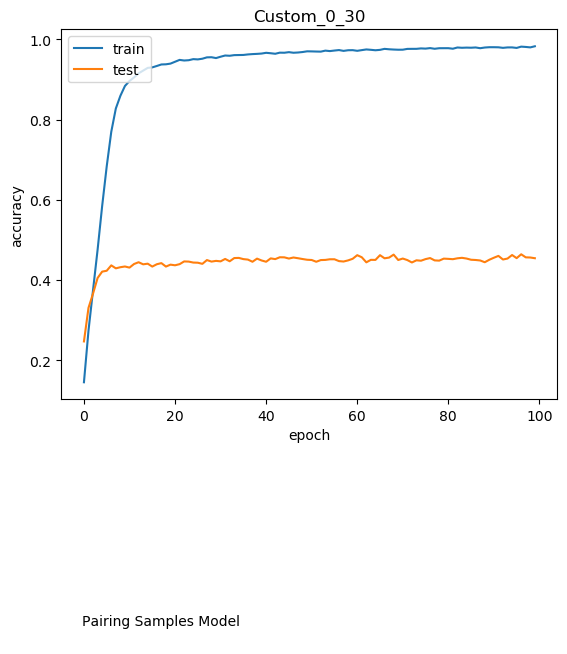

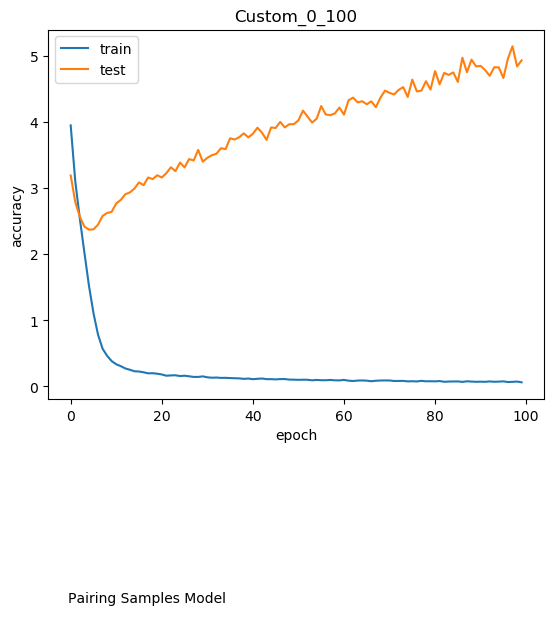

In [19]:
# Plot the accuracy and loss after 30 Epochs


caption = 'Pairing Samples Model' '\n'  

# Train/Test Accuracy Plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Custom_0_30')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.text(-.5,-.5, caption)
plt.show()

# Train/Test Loss Plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Custom_0_100')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.text(-.5,-3.5, caption)
plt.show()